In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from VersaQT.data_manip import *
from personal_projects.symbolic_reconstruct import *

from pysr import PySRRegressor
import sympy as smp

plt.rcParams["figure.figsize"] = (10, 6)  # Width=10, Height=6 (in inches)

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
corn = yf.download("ZC=F", start="2020-01-01", end="2023-12-31", interval="1d")
corn.columns = corn.columns.get_level_values(0)
corn

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,391.50,392.00,387.25,387.75,103987
2020-01-03,386.50,392.00,385.50,391.50,125931
2020-01-06,384.75,387.75,382.75,386.25,112130
2020-01-07,384.50,385.75,383.50,385.00,93541
2020-01-08,384.25,385.50,382.25,384.00,135523
...,...,...,...,...,...
2023-12-22,473.00,474.00,471.50,472.50,80484
2023-12-26,480.25,481.00,471.50,473.00,114198
2023-12-27,476.50,480.25,474.50,479.75,107950


In [3]:
corn.reset_index(inplace=True)
corn

Price,Date,Close,High,Low,Open,Volume
0,2020-01-02,391.50,392.00,387.25,387.75,103987
1,2020-01-03,386.50,392.00,385.50,391.50,125931
2,2020-01-06,384.75,387.75,382.75,386.25,112130
3,2020-01-07,384.50,385.75,383.50,385.00,93541
4,2020-01-08,384.25,385.50,382.25,384.00,135523
...,...,...,...,...,...,...
1001,2023-12-22,473.00,474.00,471.50,472.50,80484
1002,2023-12-26,480.25,481.00,471.50,473.00,114198
1003,2023-12-27,476.50,480.25,474.50,479.75,107950
1004,2023-12-28,474.25,478.75,474.00,476.00,99398


In [4]:
def time_train_test_split(X, y, train_size=0.8):
    X_ = X.reshape(-1, )
    y_ = y.reshape(-1, )

    size = X_.size
    div_id = int(X_.size*train_size)

    X_train, X_test = X_[:div_id], X_[div_id:]
    y_train, y_test = y_[:div_id], y_[div_id:]

    return X_train, y_train, X_test, y_test

In [5]:
X = np.c_[corn.index.values]
y = np.c_[corn.Close.values]

X_train, y_train, X_test, y_test = time_train_test_split(X, y)

<Axes: ylabel='Close'>

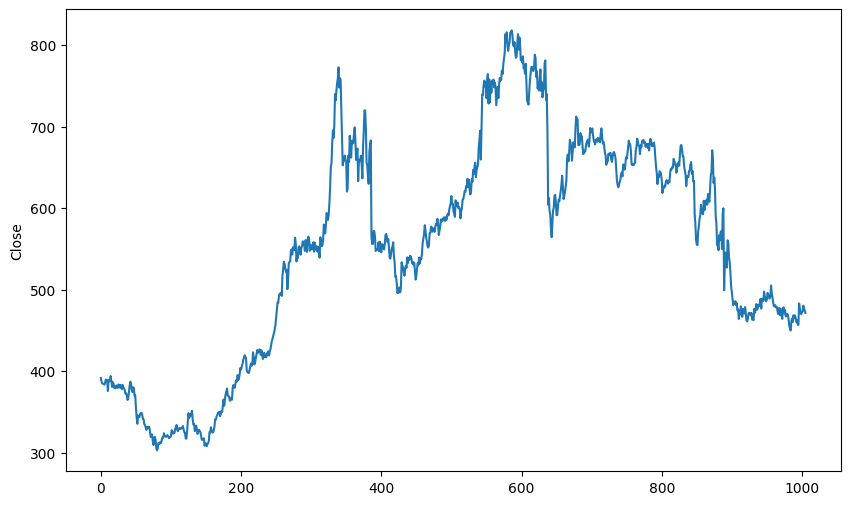

In [6]:
sns.lineplot(corn, y="Close", x=corn.index.values)

# Symbolic Reconstruct

In [ ]:
pysr = PySRRegressor(
    binary_operators=["+", "-", "*", "/"], 
    unary_operators=["exp", "cos", "sin", "tan"],
    temp_equation_file=True,
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    niterations=60,
    populations=20,
    population_size=60,
    maxsize=40,
    warm_start=False,
    verbosity=False,
    progress=False
)

In [9]:
SRReconstruct = SymbolicReconstruct(pysr, "save_results/new_tests")
SRReconstruct.fit(np.c_[X_train], np.c_[y_train], use_indexes=list(range(5, 5-3, -1)))

In [10]:
SRReconstruct.multiple_reconstruct(3)

Started Decomp - 0


e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(


Started Decomp - 1


e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(


Started Decomp - 2


e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(


In [12]:
SRReconstruct.get_best_reconstruction()

{np.int64(5): {'Expr': (exp(sin(cos(x0*(-0.0055314596))) + 2.9183152) - 1*(-5.423959))*cos(x0*(-0.020448878)),
  'MSE': np.float64(753.8014324931881),
  'Iter': np.int64(0)},
 np.int64(4): {'Expr': (tan(x0*0.0015177886)*0.19854225 + tan(-x0 + x0 + sin(0.023658233*x0 + x0 - (x0 + sin(x0*0.027146036 - 1*0.027416969)))))/0.023658233 + 7.6329556,
  'MSE': np.float64(3973.300056746097),
  'Iter': np.int64(0)},
 np.int64(3): {'Expr': sin(x0*0.15270813)/0.09438176,
  'MSE': np.float64(325.950881618079),
  'Iter': np.int64(1)}}

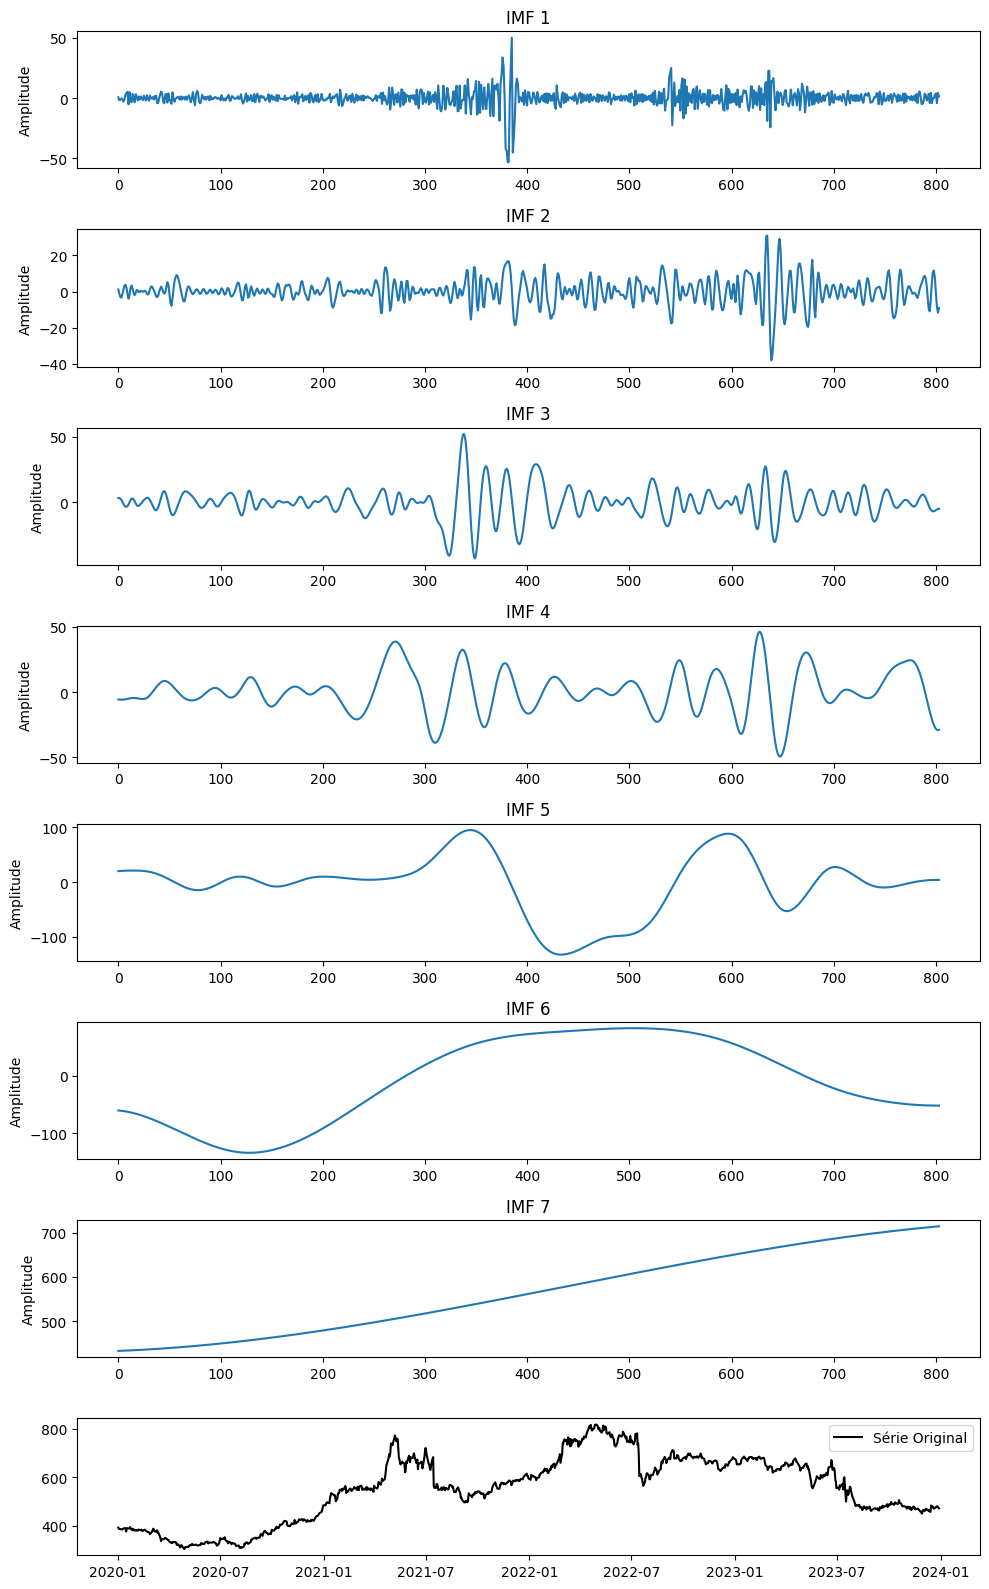

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PyEMD import CEEMDAN

# Criando uma série temporal de exemplo
t = np.linspace(0, 10, 1000)
serie = np.sin(2 * np.pi * t) + 0.5 * np.sin(4 * np.pi * t) + 0.2 * np.sin(8 * np.pi * t) + 0.1 * np.random.randn(1000)
# print(serie)

t = corn.Date.values
serie = corn.Close.values
# print(serie)

# Aplicando CEEMDAN
ceemdan = CEEMDAN()  # Criando o objeto CEEMDAN
imfs = ceemdan(y_train.reshape(-1, ))  # Decompondo a série

# Plotando os IMFs
num_imfs = imfs.shape[0]
plt.figure(figsize=(10, 16))
for i in range(num_imfs):
    plt.subplot(num_imfs + 1, 1, i + 1)
    plt.plot(X_train.reshape(-1,), imfs[i])
    plt.title(f'IMF {i+1}')
    plt.ylabel("Amplitude")

# Última subplot: série original
plt.subplot(num_imfs + 1, 1, num_imfs + 1)
plt.plot(t, serie, label="Série Original", color='black')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
pysr = PySRRegressor(
    binary_operators=["+", "-", "*", "/"], 
    unary_operators=["exp", "cos", "sin", "tan"],
    temp_equation_file=True,
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    niterations=60,
    populations=20,
    population_size=60,
    maxsize=40,
    warm_start=False,
    verbosity=False,
    progress=False
)

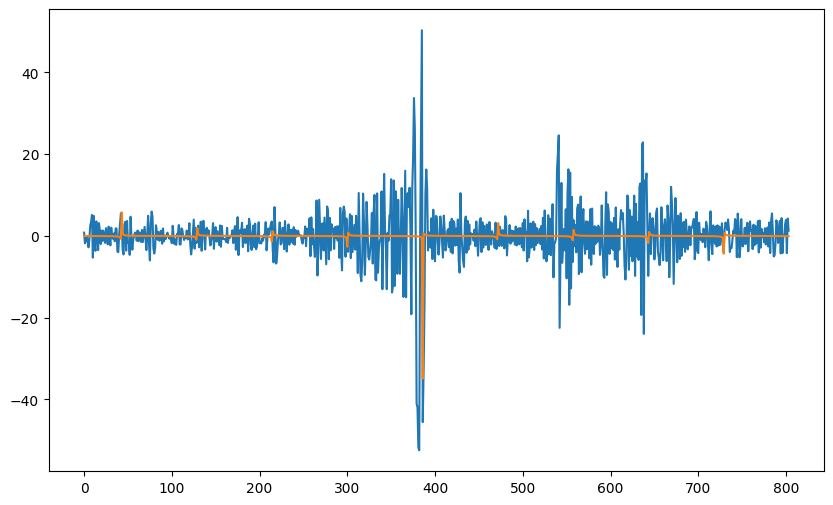

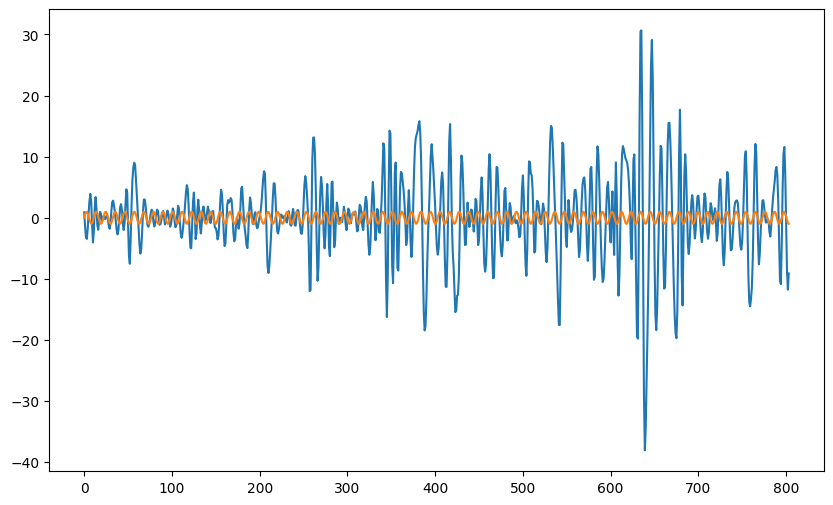

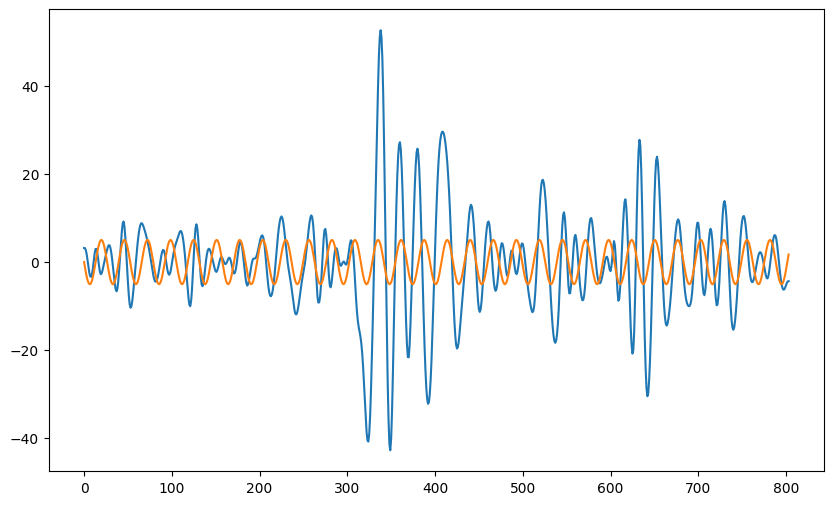

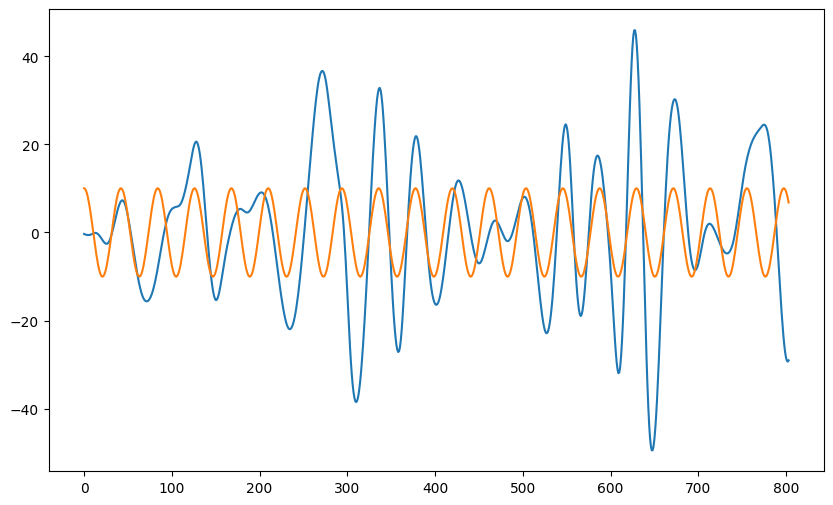

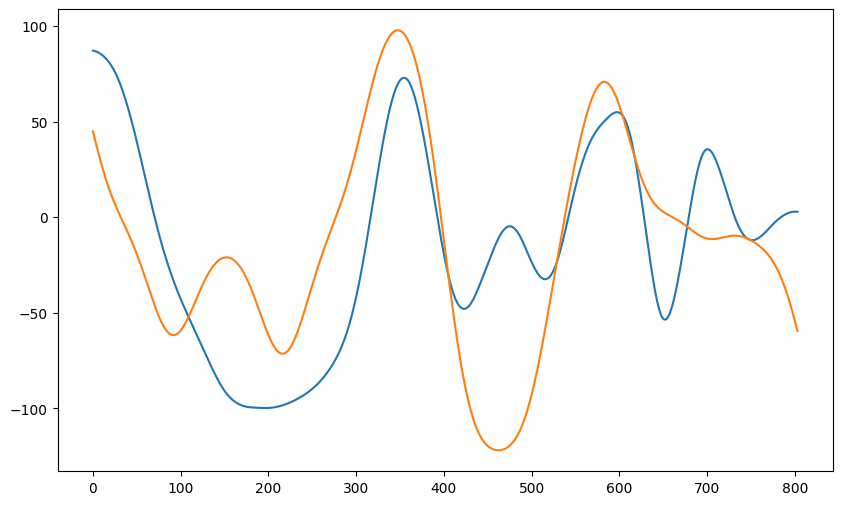

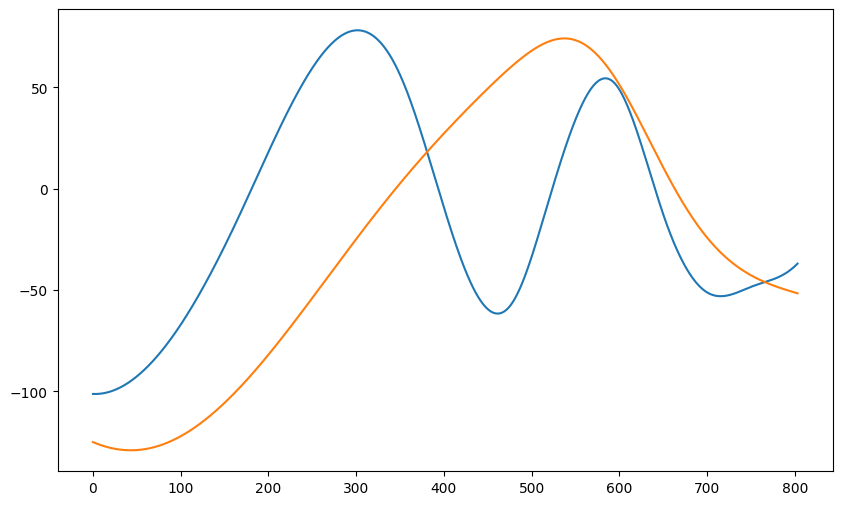

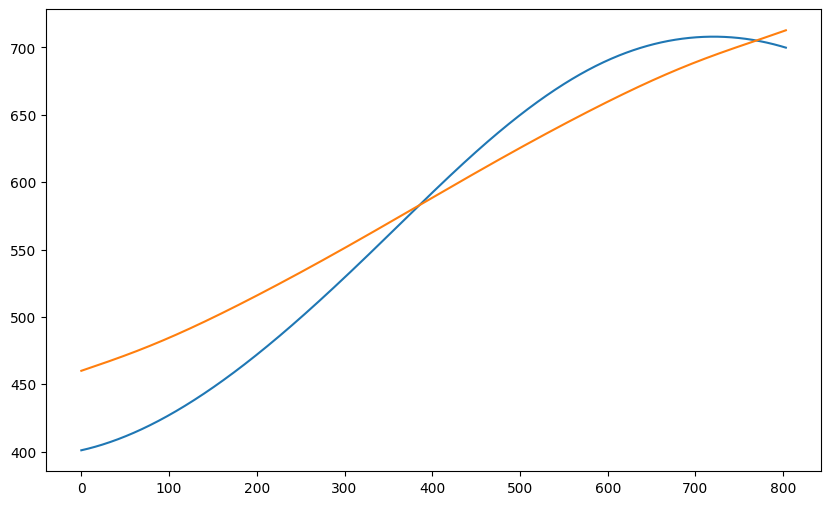

In [11]:
x = smp.symbols("x0")

with open(f"save_results/decomposition_test_train-{4}.pkl", "rb") as file:
        solutions = pickle.load(file)
solutions

plt.figure(figsize=(10, 6))

for c, sol in enumerate(solutions):
    func = smp.lambdify([x], sol)
    plt.plot(X_train, imfs[c])
    plt.plot(X_train, func(X_train))
    plt.show()

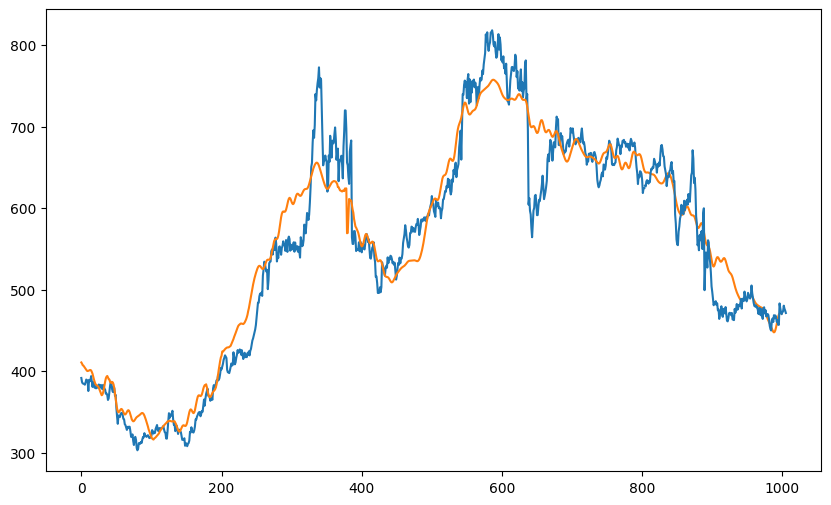

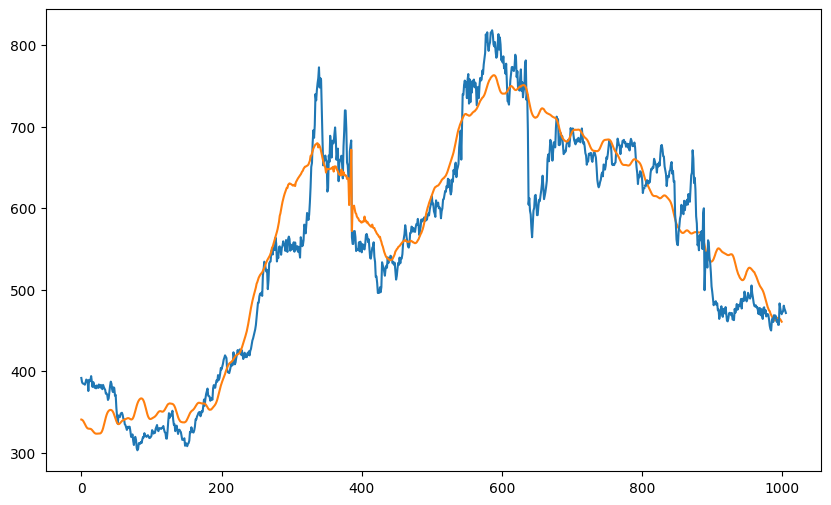

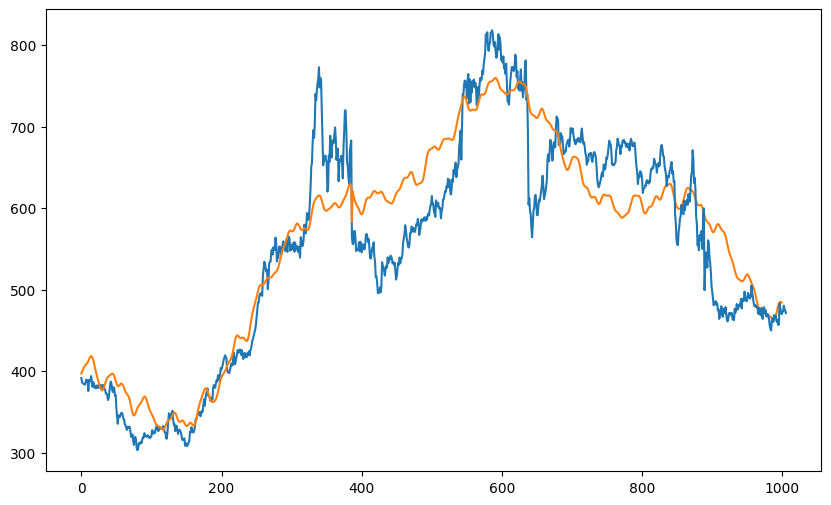

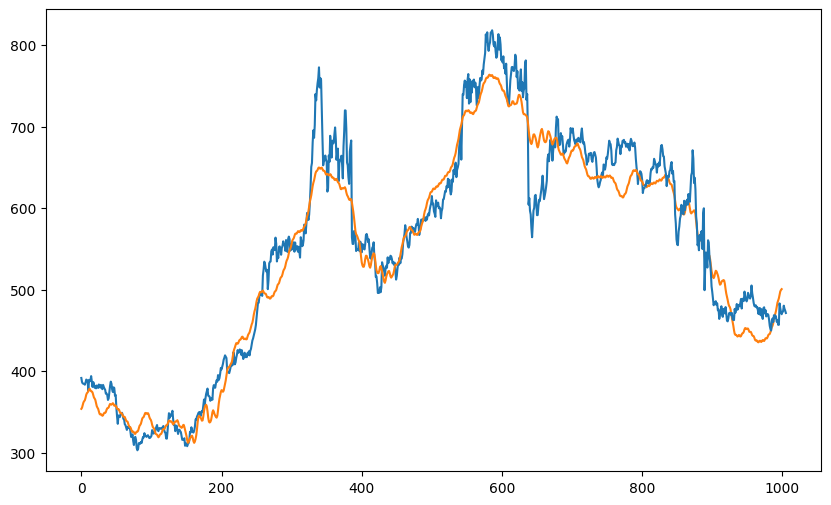

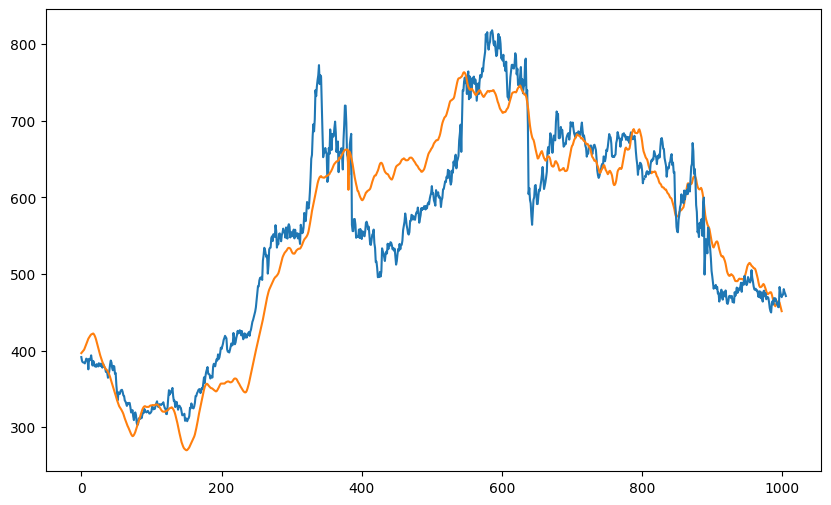

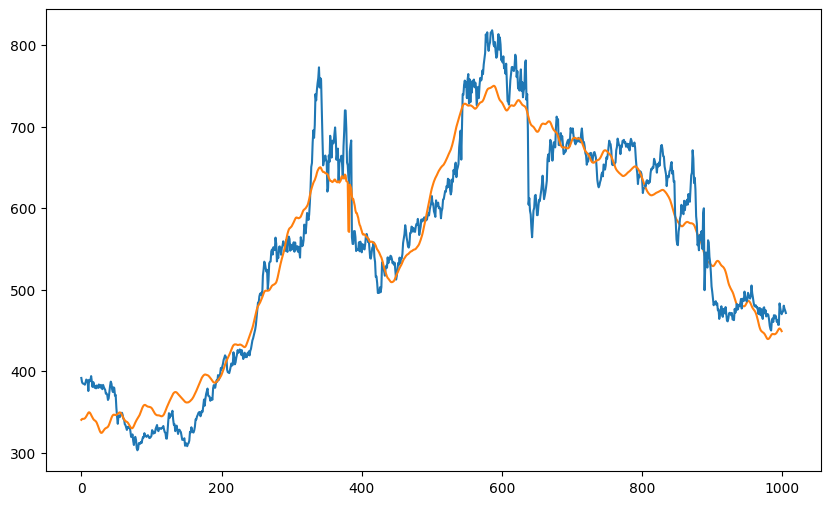

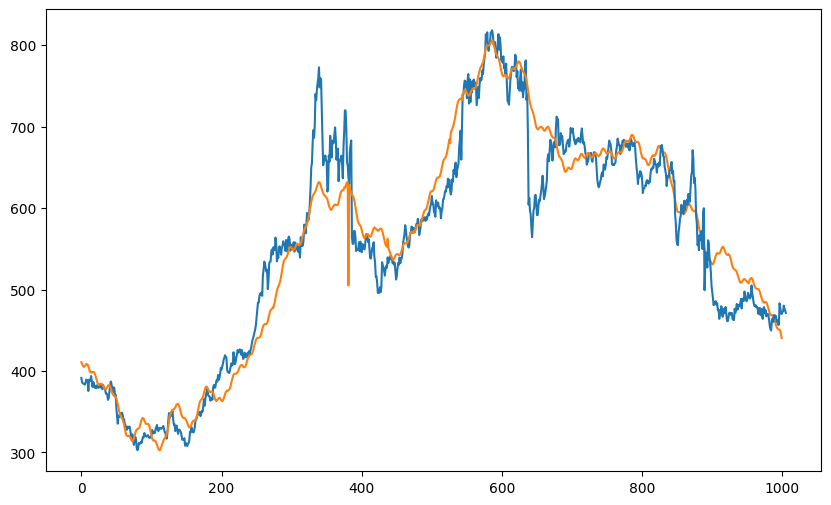

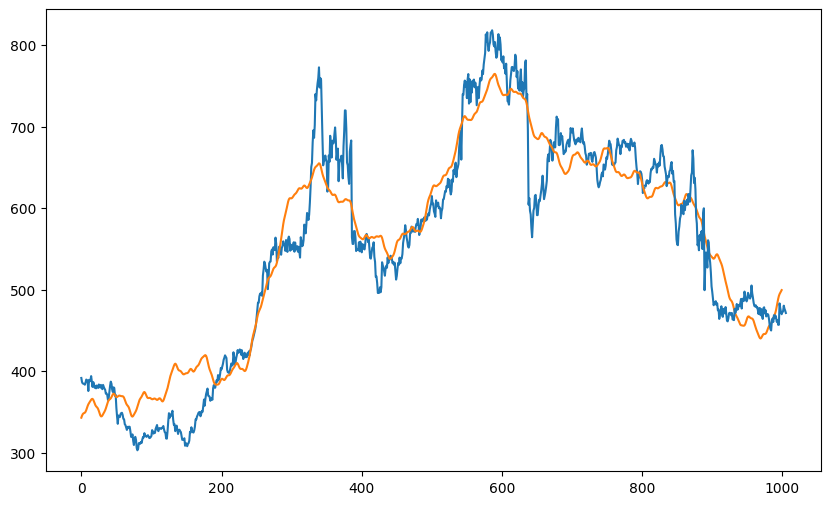

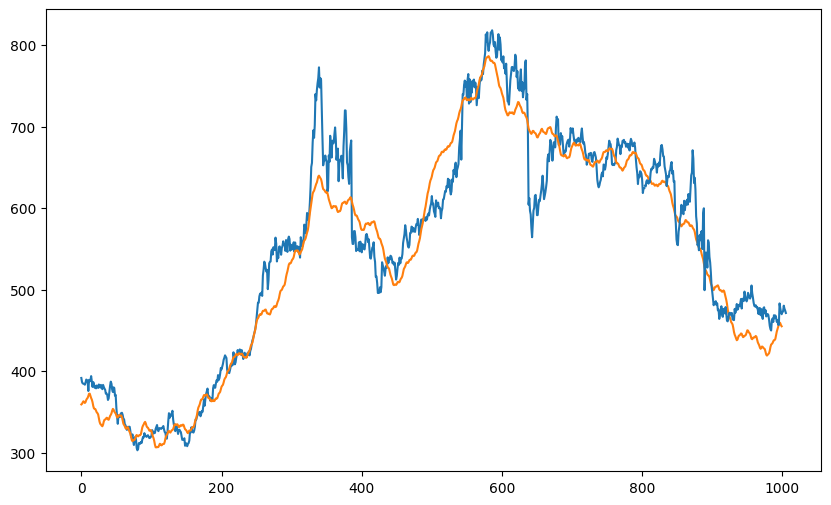

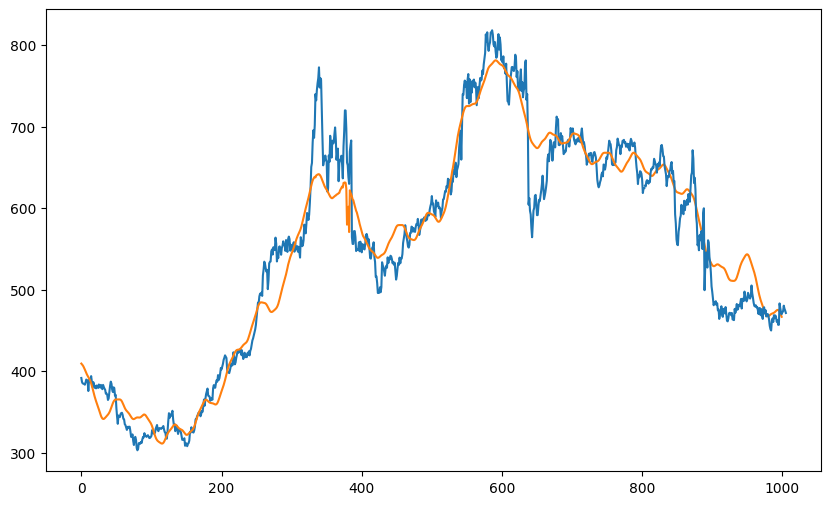

In [18]:
import pickle

x = smp.symbols("x0")

for i in range(10):
    with open(f"save_results/decomposition_test-{i}.pkl", "rb") as file:
        solutions = pickle.load(file)
    
    imfs_sum = np.sum(imfs, axis=0)
    sum_func = smp.lambdify([x], np.sum(solutions))
    plt.plot(X_train, imfs_sum, label="Train")
    # plt.plot(X, corn.Close)
    X_extend = np.arange(0, 1000)
    plt.plot(X_extend, sum_func(X_extend), label="Predicted")
    plt.plot(X_test, y_test, c="tab:blue")
    # plt.plot(X_train.reshape(-1, ), sum_func(X_train.reshape(-1, )))
    plt.show()

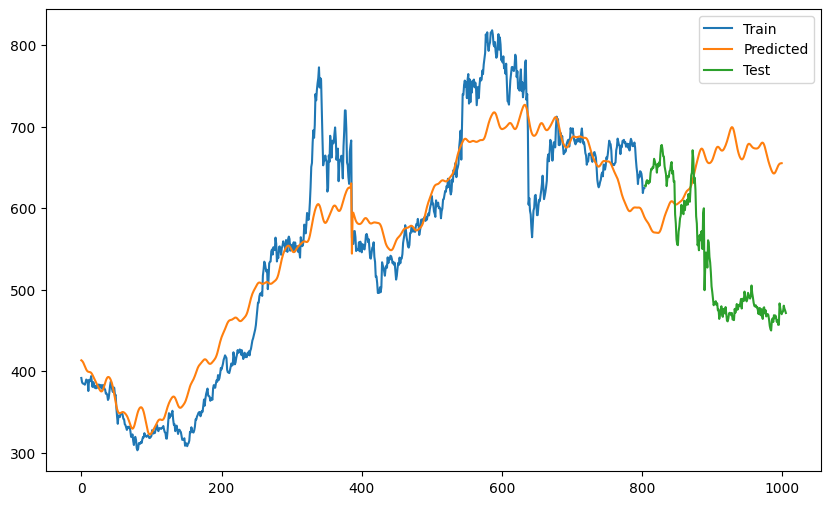

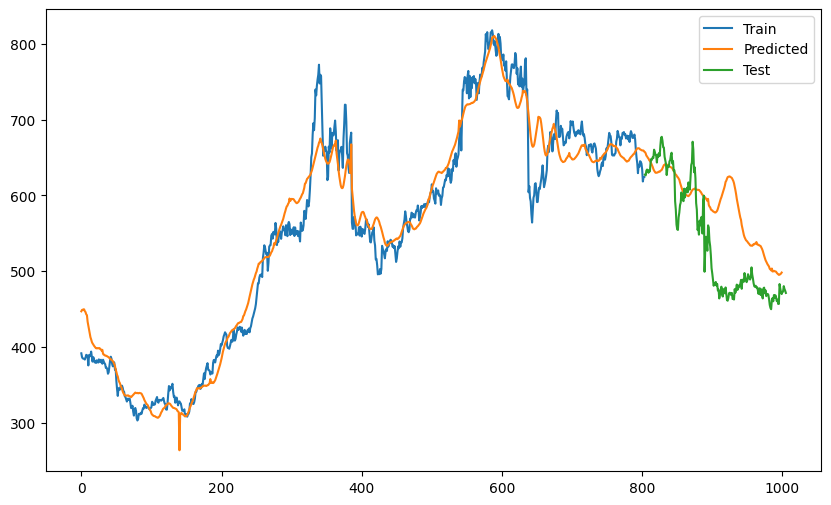

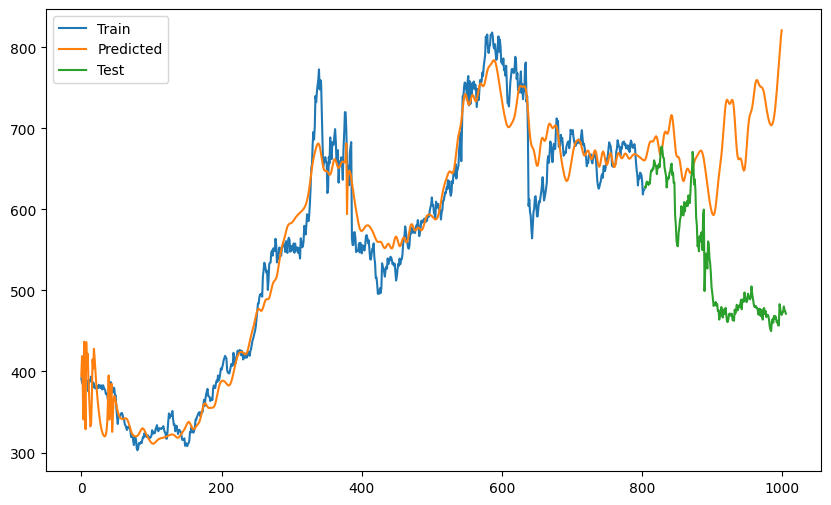

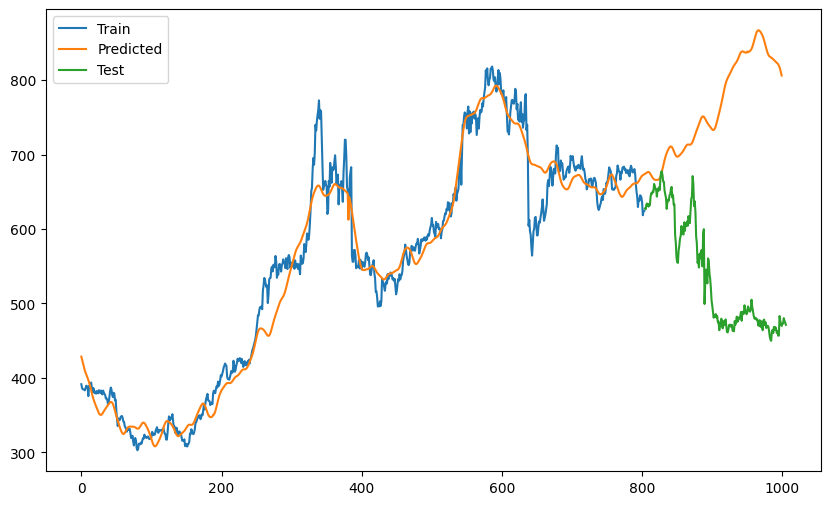

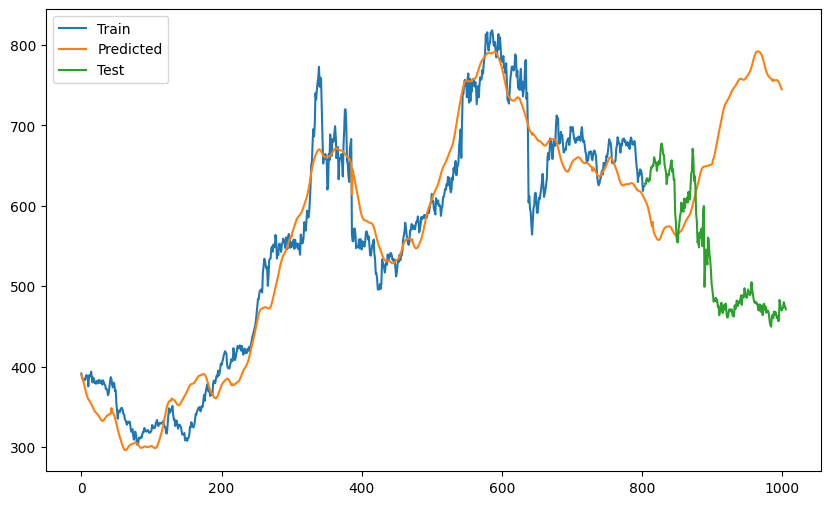

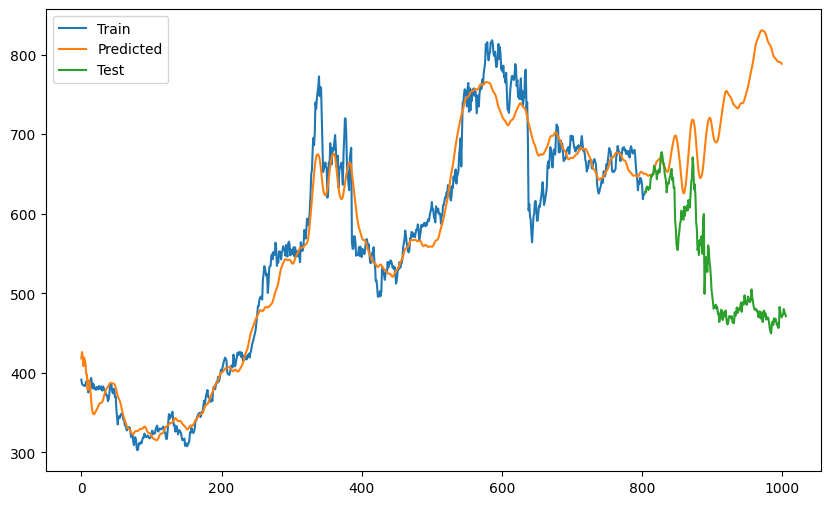

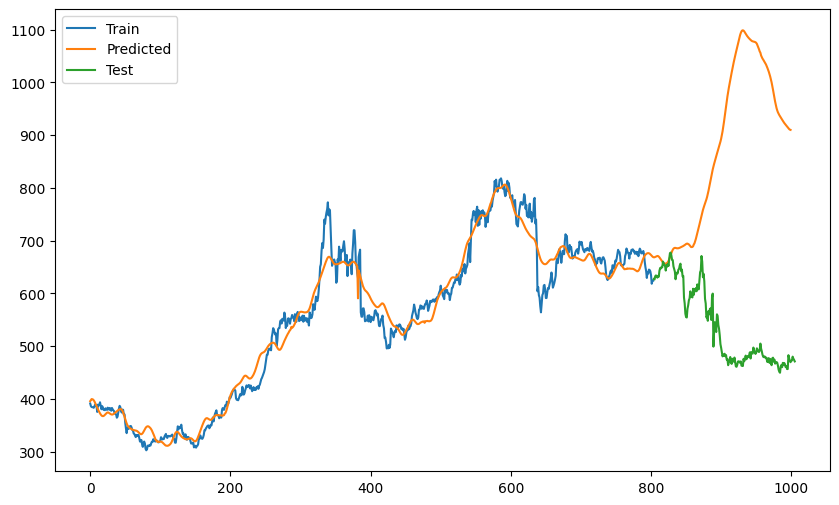

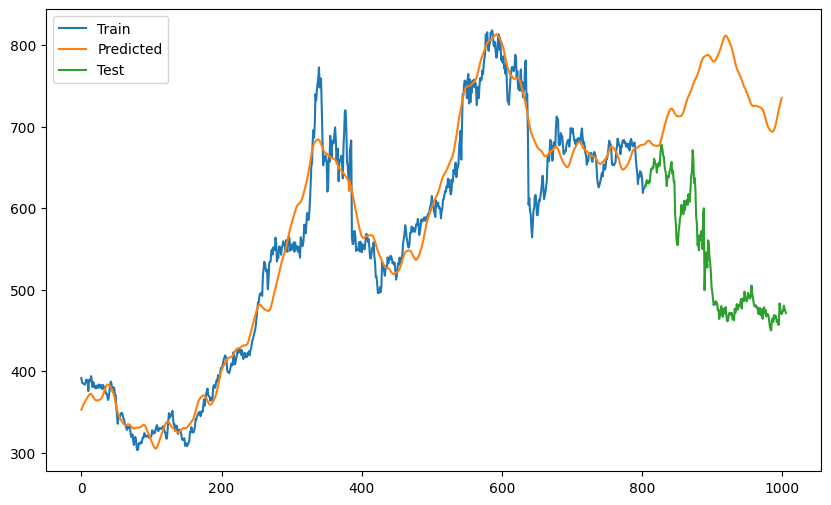

In [20]:
x = smp.symbols("x0")

for i in range(8):
    with open(f"save_results/decomposition_test_train-{i}.pkl", "rb") as file:
        solutions = pickle.load(file)
    
    imfs_sum = np.sum(imfs, axis=0)
    sum_func = smp.lambdify([x], np.sum(solutions))
    plt.plot(X_train, imfs_sum, label="Train")
    # plt.plot(X, corn.Close)
    X_extend = np.arange(0, 1000)
    plt.plot(X_extend, sum_func(X_extend), label="Predicted")
    plt.plot(X_test, y_test, label="Test")
    # plt.plot(X_train.reshape(-1, ), sum_func(X_train.reshape(-1, )))
    plt.legend()
    plt.show()